In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [14]:
bank=pd.read_csv("C:\\Users\\Raushan Kumar\\Downloads\\Bank\\bank.csv",sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
bank.shape

(41188, 21)

In [17]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [19]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
bank.duplicated().sum()

12

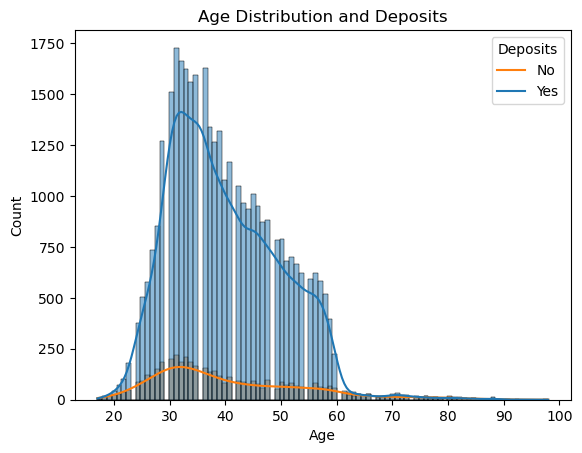

In [21]:
fig, ax = plt.subplots()
sns.histplot(data=bank, x="age", kde=True, hue="y", ax=ax)
ax.set_title("Age Distribution and Deposits")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.legend(title="Deposits", labels=["No", "Yes"])

# Show the plot
plt.show()

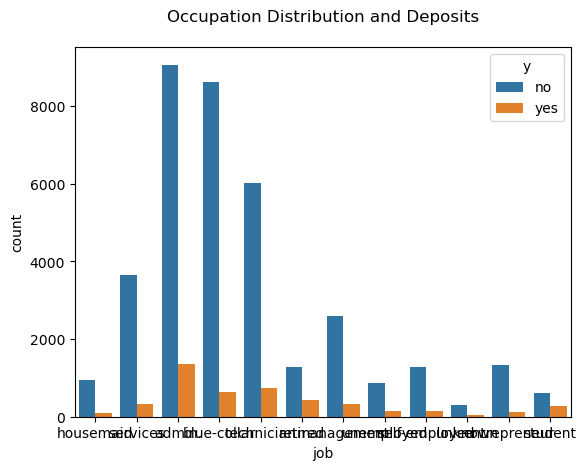

<Figure size 1500x400 with 0 Axes>

In [22]:
(
    sns.countplot(x="job", data=bank, hue="y")
    .set(title="Occupation Distribution and Deposits\n")
)
plt.figure(figsize=(15, 4))
plt.show()

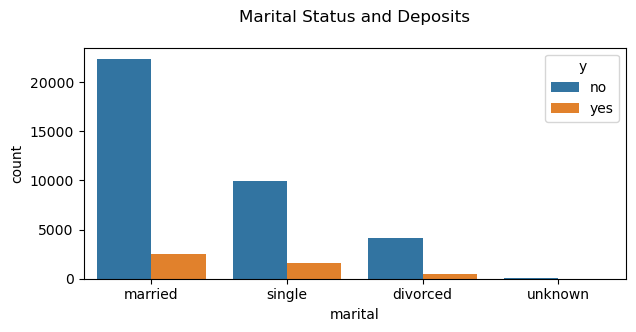

In [23]:
plt.figure(figsize=(7, 3))
sns.countplot(x="marital", data=bank, hue="y")
plt.title("Marital Status and Deposits\n")

# Show the plot
plt.show()

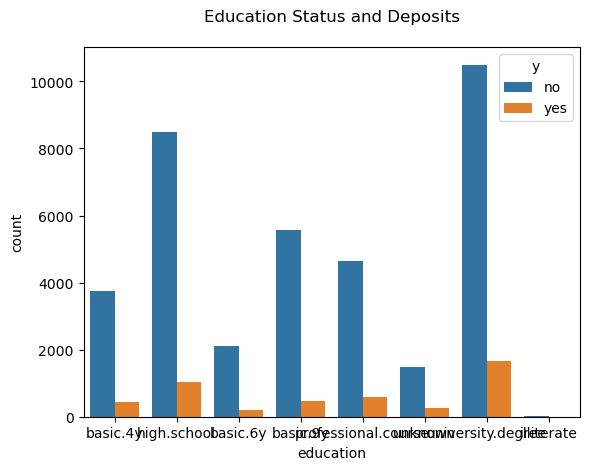

<Figure size 1200x400 with 0 Axes>

In [24]:
(
    bank
    .pipe(sns.countplot, x="education", hue="y")
    .set(title="Education Status and Deposits\n")
)
plt.figure(figsize=(12, 4))
plt.show()

In [25]:
bank.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

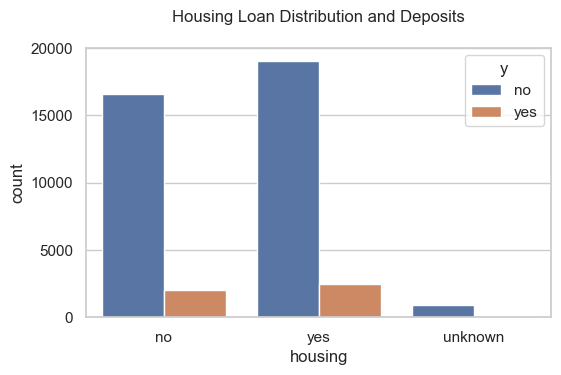

In [26]:
plt.figure(figsize=(6, 3.5))
sns.set(style="whitegrid")  
sns.countplot(x="housing", data=bank, hue="y")

# Set the title
plt.title("Housing Loan Distribution and Deposits\n")

# Show the plot
plt.show()

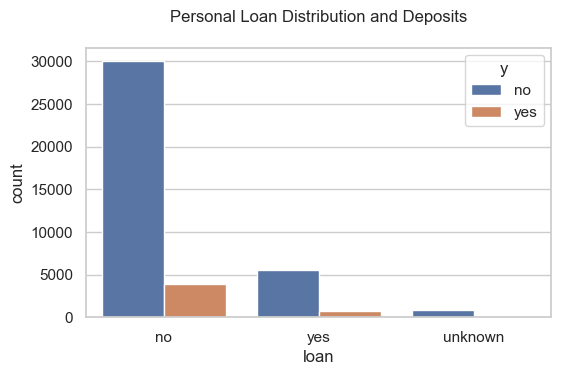

In [27]:
fig, ax = plt.subplots(figsize=(6, 3.5))
sns.countplot(x="loan", data=bank, hue="y", ax=ax)

# Set the title of the plot
ax.set_title("Personal Loan Distribution and Deposits\n")

# Show the plot
plt.show()

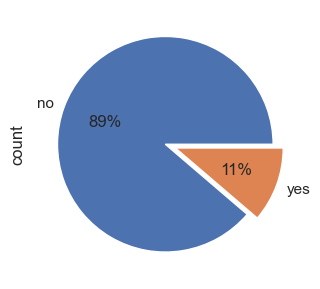

In [28]:
value_counts = bank['y'].value_counts()
plt.figure(figsize=(6, 3.5))
value_counts.plot(kind='pie', explode=[0, 0.1], autopct='%.0f%%', labels=value_counts.index)
plt.show()

In [29]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bank[cols] = bank[cols].apply(le.fit_transform)

In [31]:
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


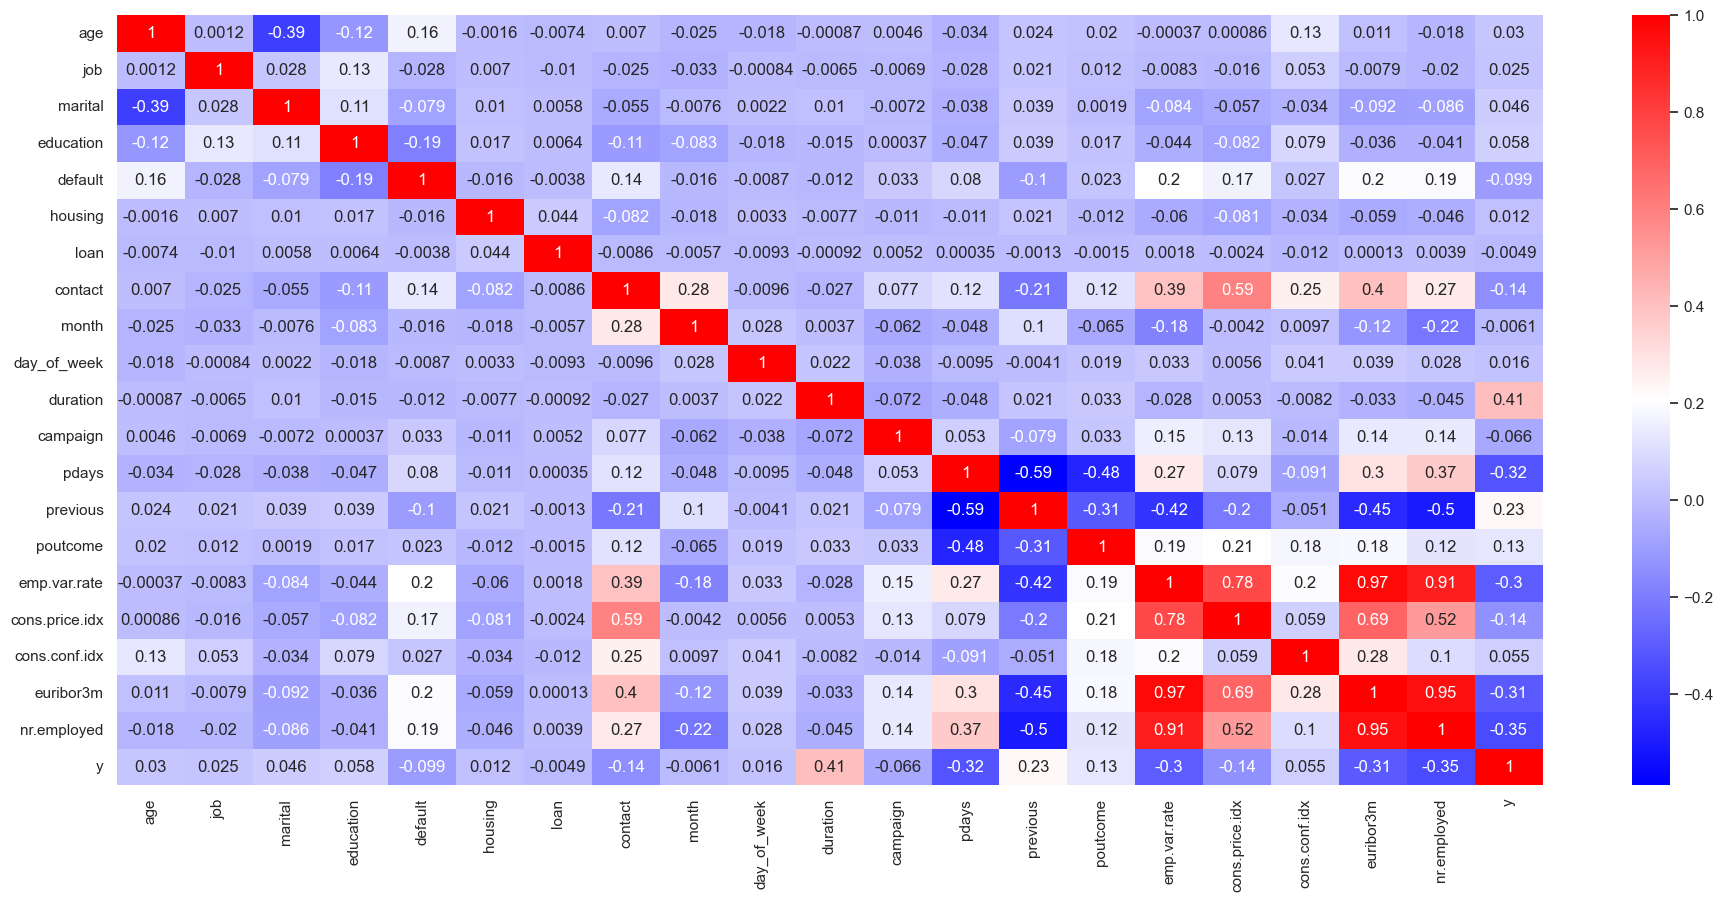

In [32]:
fig, ax = plt.subplots(figsize=(23, 10))
heatmap = sns.heatmap(bank.corr(), cmap='bwr', annot=True, ax=ax)
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = bank.drop("y", axis=1)
y = bank.y
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [34]:
#Train-test split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [35]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))  

Train Score: 1.0
Test Score: 0.8922877721129724


In [36]:
from sklearn.metrics import classification_report
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10959
           1       0.52      0.52      0.52      1398

    accuracy                           0.89     12357
   macro avg       0.73      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



In [37]:
param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [38]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [39]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20}

In [40]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)

In [41]:
from sklearn.model_selection import cross_val_score

cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 

0.9138774737146254

In [42]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [43]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9190454718878984
Test Score: 0.9133284777858703


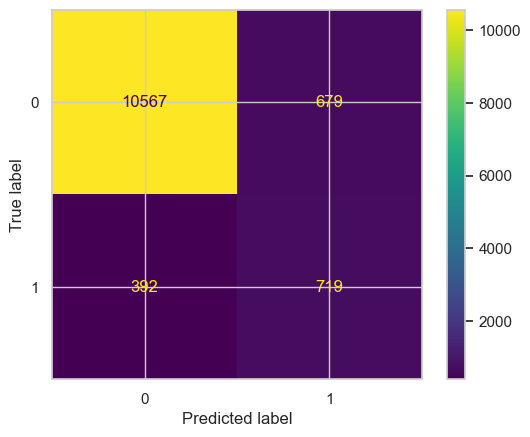

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

pred_y = clf.predict(test_X)
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [46]:
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11246
           1       0.51      0.65      0.57      1111

    accuracy                           0.91     12357
   macro avg       0.74      0.79      0.76     12357
weighted avg       0.92      0.91      0.92     12357



In [47]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 91.33284777858704


In [48]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  90.53165260713598


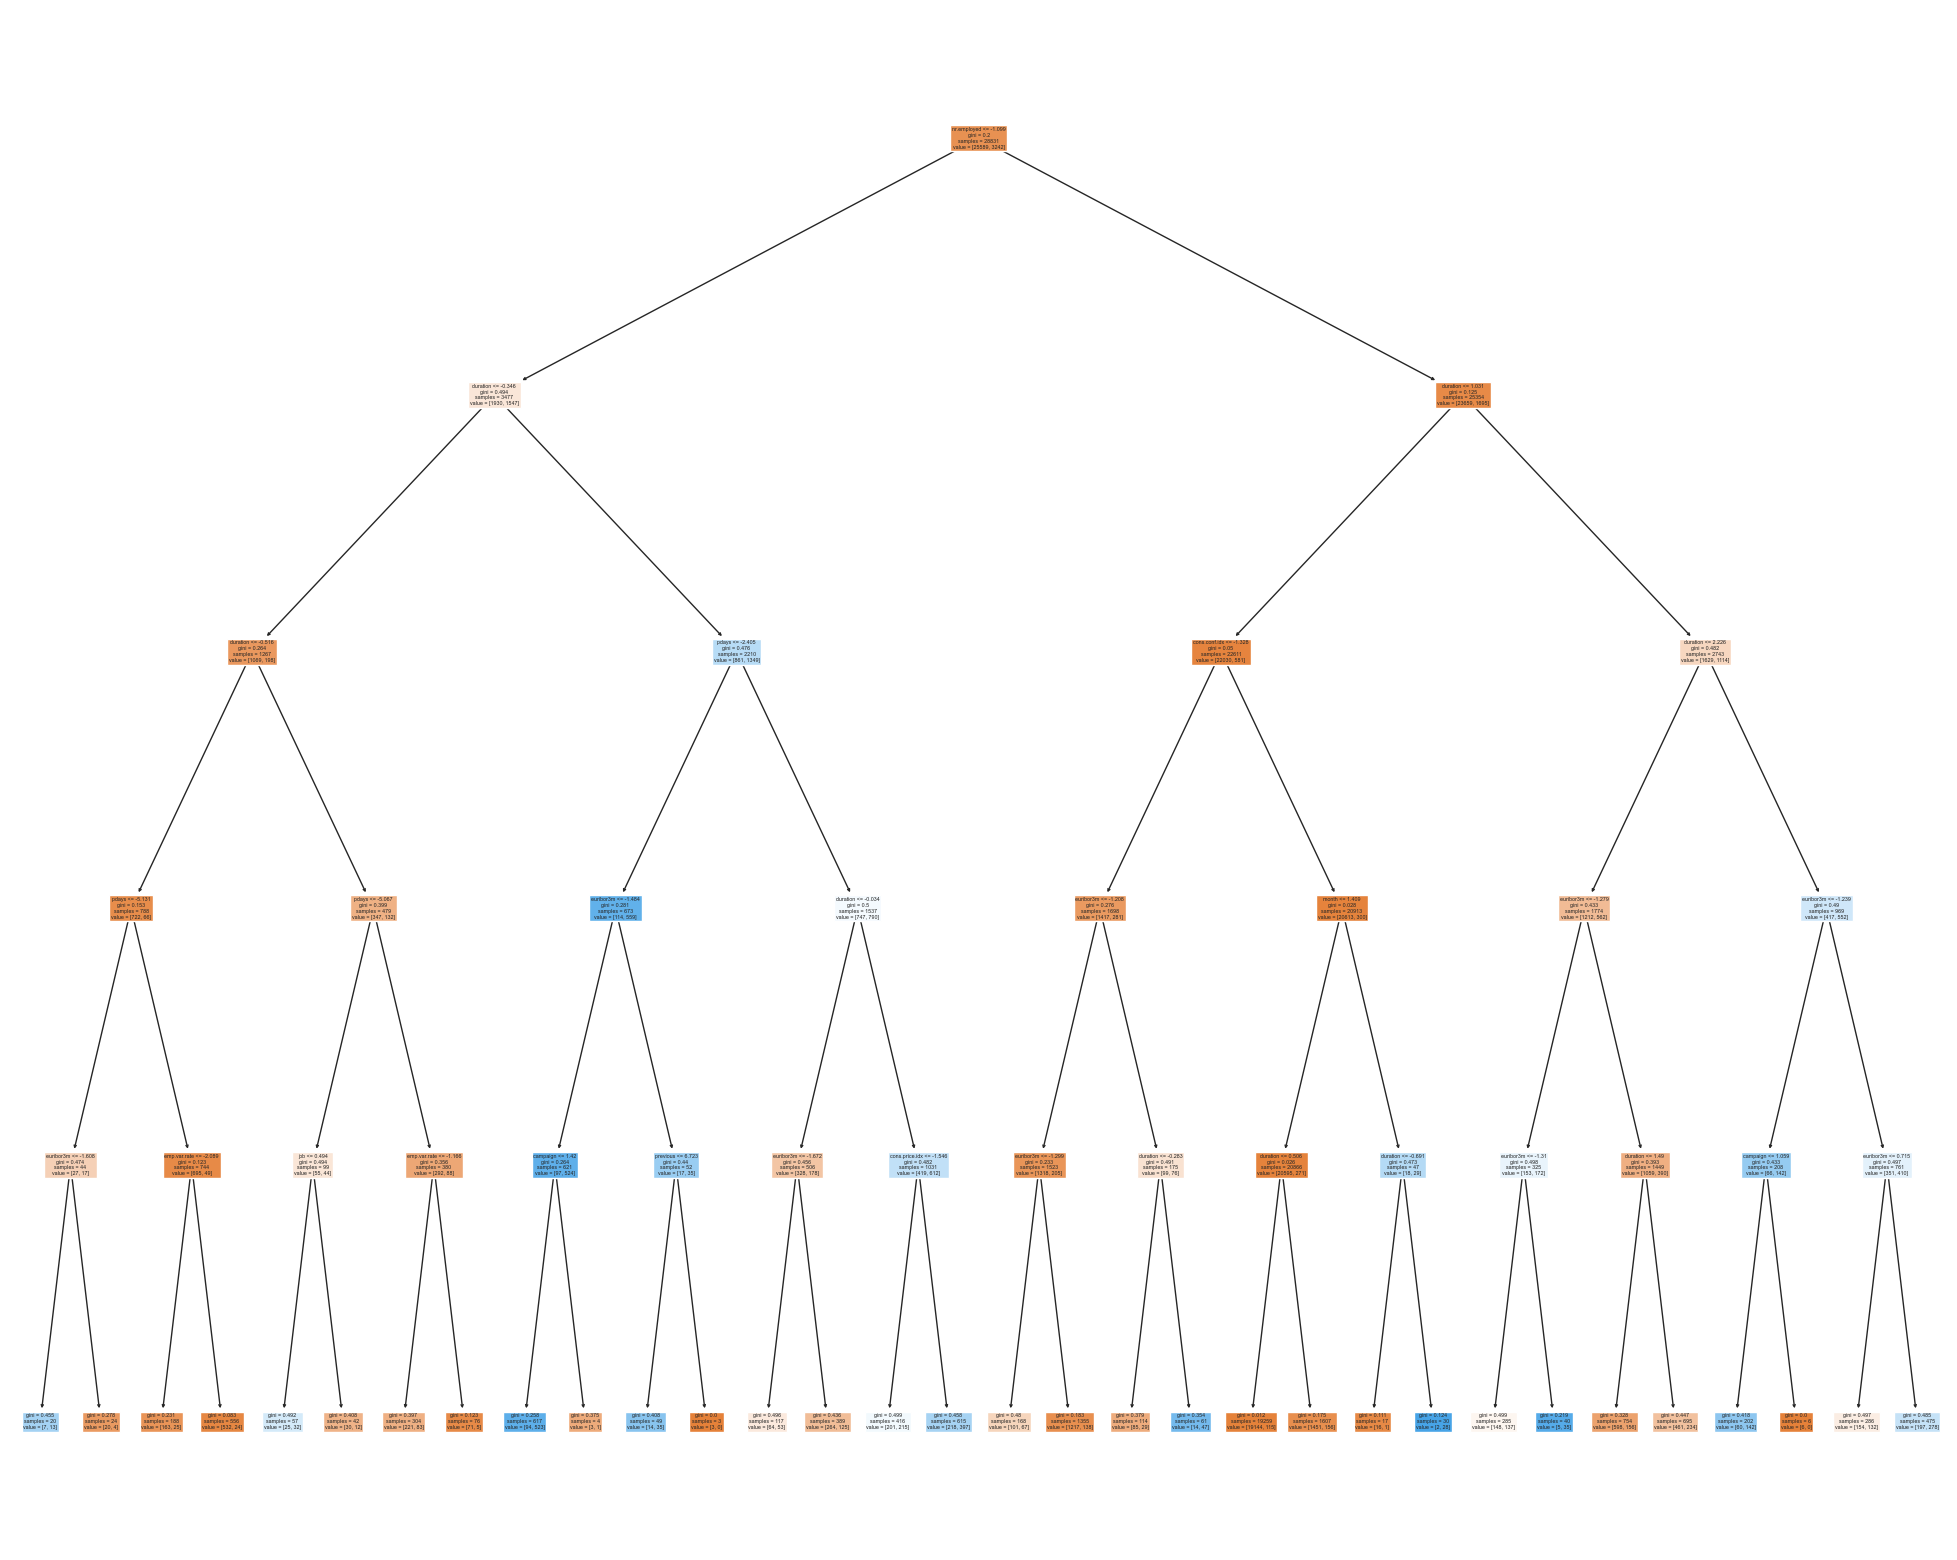

In [51]:
from sklearn import tree

# Assuming X is your DataFrame and clf is your trained decision tree classifier
fig = plt.figure(figsize=(25,20))
t = tree.plot_tree(clf, filled=True, feature_names=X.columns.tolist())
